Задание 1

Попробуем определить тип популяции опоссумов по их размерам. Для работы используйте набор данных “possum.csv”, приложенный к материалам занятия.

Описание датасета:

* case: observation number
* site: The site number where the possum was trapped.
* Pop: Population, either Vic (Victoria) or other (New South Wales or Queensland).
* sex: Gender, either m (male) or f (female).
* age: Age.
* hdlngth: Head length, in mm.
* skullw: Skull width, in mm.
* totlngth: Total length, in cm.
* taill: Tail length, in cm.
* footlgth: foot length
* earconch: ear conch length
* eye: distance from medial canthus to lateral canthus of right eye
* chest: chest girth (in cm)
* belly: belly girth (in cm)

Для выполнения задания:

* Выберите и оставьте числовые признаки, по которым будете определять тип животных, и целевую переменную - Рор
* Закодируйте значения по столбцу Рор в 0 и 1 (можно использовать метод LabelEncoder)
* Разделите данные на выборку для обучения и тестирования (в соотношении 80 - тренировочная, 20 - тестовая)
* Постройте модель LDA
* Рассчитайте точность вашей модели на тестовой выборке

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('possum.csv')
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [4]:
data.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [8]:
# Удаляем пропуски
data = data[data[['age', 'footlgth']].notna().all(axis=1)]

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [10]:
# Закодируйте значения по столбцу Рор в 0 и 1 (можно использовать метод LabelEncoder)
data_pop = le.fit_transform(data['Pop'])

In [11]:
le.classes_

array(['Vic', 'other'], dtype=object)

In [12]:
# Выберите и оставьте числовые признаки, по которым будете определять тип животных, и целевую переменную - Рор
# Удаляем из рассмотрения признаки Рор и sex
data = data.loc[:, (data.columns != 'Pop') & (data.columns != 'sex')]
data

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [13]:
# Разделим выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_pop, test_size=0.20, random_state=42)

In [14]:
len(y_test)

21

In [17]:
# Построим модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [18]:
# Обучим данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [19]:
# Делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [20]:
# Смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [21]:
result

,0,1
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [22]:
# Рассчитаем точность вашей модели на тестовой выборке
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lda.predict(X_test))

1.0

Задание 2
Теперь кластеризируем страны на основании показателей импорта и экспорта. Для работы используйте набор данных “Country-data.csv”, приложенный к материалам занятия.

Описание датасета:

* country: Name of the country
* child_mort: Death of children under 5 years of age per 1000 live births
* exports: Exports of goods and services per capita. Given as %age of the GDP per capita
* health: Total health spending per capita. Given as %age of GDP per capita
* imports: Imports of goods and services per capita. Given as %age of the GDP per capita
* income: Net income per person
* inflation: The measurement of the annual growth rate of the Total GDP
* life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
* total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
* gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

Для выполнения задания:

* Выберите и оставьте только те признаки, по которым будете проводить кластерный анализ.
* Подберите оптимальное число кластеров для алгоритма K-means.
* Визуализируйте полученную кластеризацию.
* Проверьте правильность выбора кластеров с помощью метода локтя.
* Примените алгомеративную кластеризацию с учётом рассчитанного методом локтя оптимального количества кластеров.
* Визуализируйте результат.
* Желательно, но не обязательно:
Попробуйте провести кластеризацию с помощью других столбцов в наборе, оцените результаты.

In [31]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [33]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<Axes: xlabel='health', ylabel='gdpp'>

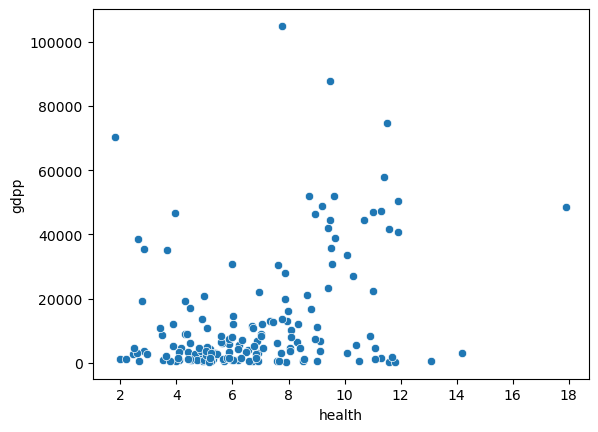

In [35]:
# Попробуем кластеризовать страны по Расходам на здравоохранение на душу населения и ВВП на душу населения.
X = data[['health', 'gdpp']]
sns.scatterplot(x=data['health'], y=data['gdpp'])

In [36]:
# Приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.79088247e-01, -6.79179609e-01],
       [-9.70161825e-02, -4.85623236e-01],
       [-9.66073021e-01, -4.65375609e-01],
       [-1.44807093e+00, -5.16268293e-01],
       [-2.86894147e-01, -4.18171341e-02],
       [ 4.68966212e-01, -1.45791437e-01],
       [-8.82088536e-01, -5.33232522e-01],
       [ 6.99010669e-01,  2.13069856e+00],
       [ 1.52790101e+00,  1.85708197e+00],
       [-3.41666637e-01, -3.89857431e-01],
       [ 3.92284726e-01,  8.22811276e-01],
       [-6.73953075e-01,  4.23331061e-01],
       [-1.20342048e+00, -6.67961329e-01],
       [ 4.21496721e-01,  1.66131471e-01],
       [-4.40257119e-01, -3.79460001e-01],
       [ 1.41835604e+00,  1.72027368e+00],
       [-5.89968591e-01, -4.71942407e-01],
       [-9.91633516e-01, -6.67961329e-01],
       [-5.89968591e-01, -5.90144772e-01],
       [-7.21422566e-01, -6.01089435e-01],
       [ 1.56441601e+00, -4.57167111e-01],
       [ 5.41996198e-01, -3.61948539e-01],
       [ 8.01252650e-01, -9.65404512e-02],
       [-1.

/Users/annamarkina/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/y4/m_h08_mx5632hfk34wzwpt4c0000gn/T/ipykernel_5053/3288412568.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Clusters_k3'] = predictions


Text(0.5, 1.0, 'k-means с количеством кластеров 3')

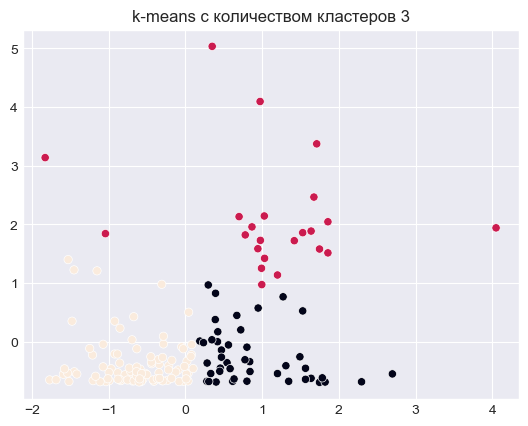

In [58]:
# Подбераем оптимальное число кластеров для алгоритма K-means
from sklearn.cluster import KMeans

# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, random_state=42)

predictions = kmeans.fit_predict(X_scaled)
predictions = kmeans.labels_

X['Clusters_k3'] = predictions

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], c=predictions).set_title('k-means с количеством кластеров 3')

In [40]:
X

,health,gdpp,Clusters_k3
0,7.58,553,0
1,6.55,4090,2
2,4.17,4460,2
3,2.85,3530,2
4,6.03,12200,2
...,...,...,...
162,5.25,2970,2
163,4.91,13500,2
164,6.84,1310,2
165,5.18,1310,2


In [41]:
# Добавляем третий признак — inflation
X = data[['health', 'gdpp', 'inflation']]

kmeans = KMeans(n_clusters=3, random_state=42)


predictions = kmeans.fit_predict(X)
predictions = kmeans.labels_
X['Clusters_k3'] = predictions
X

/Users/annamarkina/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/y4/m_h08_mx5632hfk34wzwpt4c0000gn/T/ipykernel_5053/498937977.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Clusters_k3'] = predictions


,health,gdpp,inflation,Clusters_k3
0,7.58,553,9.44,0
1,6.55,4090,4.49,0
2,4.17,4460,16.10,0
3,2.85,3530,22.40,0
4,6.03,12200,1.44,0
...,...,...,...,...
162,5.25,2970,2.62,0
163,4.91,13500,45.90,0
164,6.84,1310,12.10,0
165,5.18,1310,23.60,0


/Users/annamarkina/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/annamarkina/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/annamarkina/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/annamarkina/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

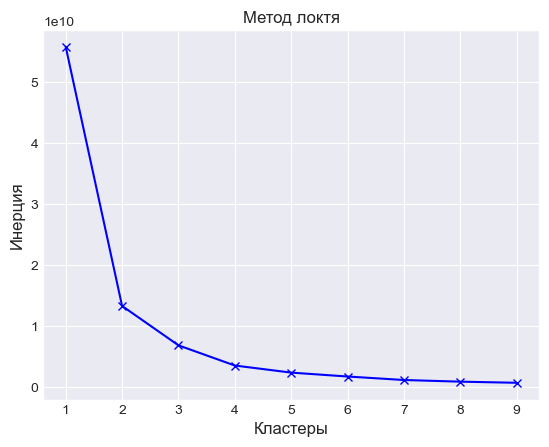

In [52]:
# Метод локтя
def get_inertia(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num,  random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Инерция", fontsize=12)
plt.title('Метод локтя')
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
plt.show()

[Text(0.5, 1.0, 'Метрика силуэта')]

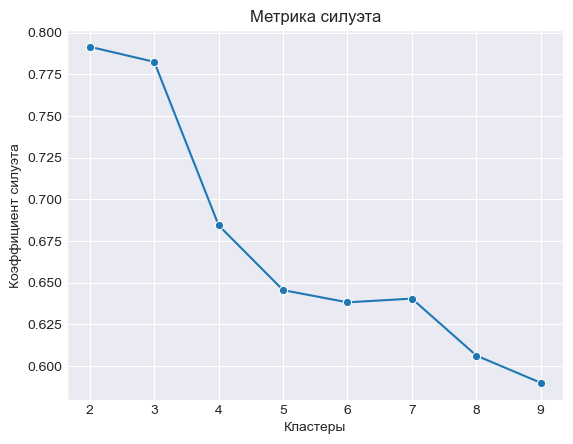

In [57]:
# Проверим реализацию метрики силуэта
from sklearn.metrics import silhouette_score

def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, n_init=10, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

silhouette_res = {"Коэффициент силуэта": [], "Кластеры": []}

X = data[['health', 'gdpp']] 

for cluster_num in range(2, 10):
    silhouette_res["Коэффициент силуэта"].append(get_silhouette(cluster_num, X))
    silhouette_res["Кластеры"].append(cluster_num)

silhouette_df = pd.DataFrame(silhouette_res)


sns.set_style("darkgrid")
sns.lineplot(data=silhouette_df, x="Кластеры", y="Коэффициент силуэта", marker= "o").set(title='Метрика силуэта')

### Согласно методу локтя определяем однозначные 2 кластера, по методу силуэта можем предположить также 2

In [44]:
data_ = data[['health', 'gdpp']]

/var/folders/y4/m_h08_mx5632hfk34wzwpt4c0000gn/T/ipykernel_5053/3039706938.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


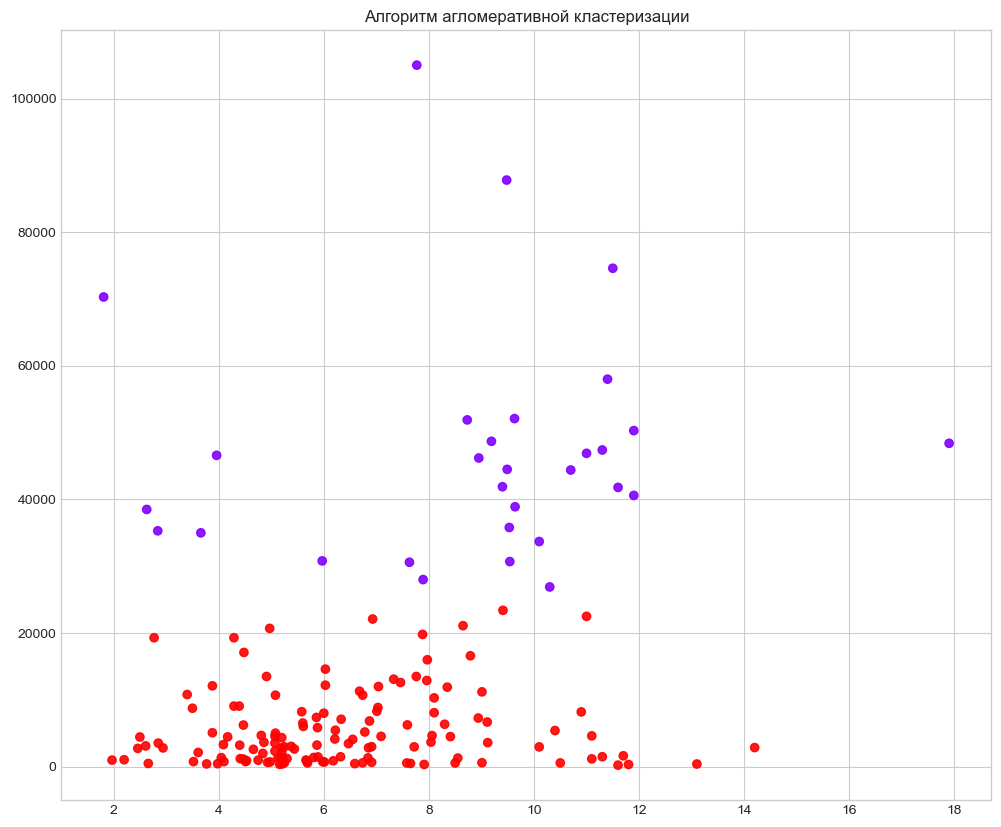

In [59]:
# Реализуем алгоритм агломеративной кластеризации с учетом 2 кластеров
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
model.fit(data_)
pred = model.fit_predict(data_)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(data["health"], data["gdpp"], c=pred, cmap='rainbow', alpha=0.9)
plt.title('Алгоритм агломеративной кластеризации')
plt.show()